In [46]:

import pandas as pd
import numpy as np
import warnings
import torch
warnings.filterwarnings('ignore')

data1 = pd.read_csv('data1.csv') #first_descriptors
data2 = pd.read_csv('data2.csv') #second_descriptors
data3 = pd.read_csv('data3.csv') #first_and_second_fp

pd.set_option('display.float_format', '{:.2f}'.format)

seed = 1

In [47]:
data3

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol,MACCS_fp,morgan_fp
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.00,3.49,40.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0...
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.00,5.19,50.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.00,4.25,10000.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.00,5.66,4500.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0...
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.00,5.28,190.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
...,...,...,...,...,...,...,...,...
6009,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.00,6.00,14700.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
6010,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.00,1.85,83920.88,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
6011,Nc1ccc(O)c(C(=O)O)c1,153.14,0.00,0.67,7530.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
6012,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.00,4.09,880.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [48]:
def set_all_seeds(seed):

    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed) 

        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False # Может замедлить обучение, но обеспечивает детерминизм

set_all_seeds(seed)

In [49]:
data1

,smiles,molecular_weight,#ro5_violations,alogp,standard_value,mol,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea
0,CC1(C)OC(=O)C(OC2CCCCC2)=C1c1ccc(S(C)(=O)=O)cc1,364.46,0.00,3.49,40.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,13.42,1.69,-5.76,0.77,...,0,0,0,1,0,0,0,0,0,0
1,CCCCOC(=O)Cc1c(C)n(C(=O)c2ccc(Cl)cc2)c2ccc(OC)...,413.90,1.00,5.19,50.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.24,0.17,-4.41,0.39,...,0,0,0,0,0,0,0,0,0,0
2,CS(=O)(=O)c1ccc(-c2csc(CC(=O)O)c2-c2ccc(F)cc2)cc1,390.46,0.00,4.25,10000.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.35,0.09,-5.47,0.71,...,0,0,0,1,0,0,0,0,1,0
3,CC(C)CCCC(=O)c1cc(C(C)(C)C)c2c(c1)C(C)(C)CO2,316.49,1.00,5.66,4500.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.33,1.99,-4.95,0.65,...,0,0,0,0,0,0,0,0,0,0
4,COc1ccc2c(c1)c(CC(=O)NCCOC(=O)/C=C/c1ccc(N(C)C...,574.08,2.00,5.28,190.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838D...,14.50,0.24,-4.59,0.16,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,COc1ccc(/C=C/c2c(CC=C(C)C)c(O)cc(O)c2CC=C(C)C)...,394.51,1.00,6.00,14700.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,9.12,1.25,-4.19,0.40,...,0,0,0,0,0,0,0,0,0,0
6010,CC[C@@]1(O)C(=O)OCc2c1cc1n(c2=O)Cc2cc3c(CN(C)C...,421.45,0.00,1.85,83920.88,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,14.24,0.04,-4.11,0.49,...,0,0,0,0,0,0,0,0,0,0
6011,Nc1ccc(O)c(C(=O)O)c1,153.14,0.00,0.67,7530.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,11.27,0.11,-1.38,0.41,...,0,0,0,0,0,0,0,0,0,0
6012,Cc1c(Cl)cccc1Nc1ccccc1C(=O)O,261.71,0.00,4.09,880.00,<rdkit.Chem.rdchem.Mol object at 0x0000023838E...,12.04,0.05,-3.09,0.87,...,0,0,0,0,0,0,0,0,0,0


In [50]:
data_list = [data1,data2,data3]
epsilon = 1e-9
for df in data_list:

    df.drop(['molecular_weight', '#ro5_violations', 'alogp'], axis=1, inplace=True) # Начав 4 таску, я понял, что эти столбцы я уже не смогу получить, поэтому я их тут убираю и обучаю без них. но скорей всего молекулярная масса и так есть в дескрипторах
    
    df['pic50'] = -(np.log10(df.standard_value + epsilon)) # this will calculate the pIC50 value from IC50 (nM)
    
    df.drop(['smiles', 'mol'], axis=1, inplace=True)
    df.drop(['standard_value'], axis=1, inplace=True)


<Axes: ylabel='pic50'>

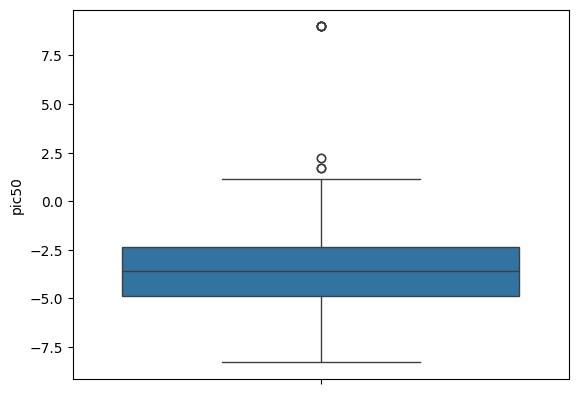

In [51]:
import seaborn as sns

sns.boxplot(data1.pic50)

In [52]:
data1

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea,pic50
0,13.42,1.69,-5.76,0.77,48.24,364.46,0.37,-0.48,0.48,1.28,...,0,0,1,0,0,0,0,0,0,-1.60
1,14.24,0.17,-4.41,0.39,26.24,413.90,0.31,-0.50,0.50,1.24,...,0,0,0,0,0,0,0,0,0,-1.70
2,14.35,0.09,-5.47,0.71,20.58,390.46,0.31,-0.48,0.48,1.23,...,0,0,1,0,0,0,0,1,0,-4.00
3,14.33,1.99,-4.95,0.65,45.22,316.48,0.16,-0.49,0.49,1.52,...,0,0,0,0,0,0,0,0,0,-3.65
4,14.50,0.24,-4.59,0.16,25.10,574.08,0.33,-0.50,0.50,1.15,...,0,0,0,0,0,0,0,0,0,-2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,9.12,1.25,-4.19,0.40,29.24,394.51,0.29,-0.51,0.51,1.00,...,0,0,0,0,0,0,0,0,0,-4.17
6010,14.24,0.04,-4.11,0.49,35.39,421.45,0.34,-0.51,0.51,1.45,...,0,0,0,0,0,0,0,0,0,-4.92
6011,11.27,0.11,-1.38,0.41,17.27,153.14,0.34,-0.51,0.51,1.82,...,0,0,0,0,0,0,0,0,0,-3.88
6012,12.04,0.05,-3.09,0.87,20.06,261.71,0.34,-0.48,0.48,1.39,...,0,0,0,0,0,0,0,0,0,-2.94


In [53]:
df['MACCS_fp'] = df['MACCS_fp'].apply(lambda x: [int(i) for i in x.strip('[]').split()])

# Для morgan_fp
df['morgan_fp'] = df['morgan_fp'].apply(lambda x: [int(i) for i in x.strip('[]').split()])

# Разделение столбца 'MACCS_fp' на новые столбцы
maccs_df = pd.DataFrame(df['MACCS_fp'].tolist(), index=df.index)
maccs_df.columns = [f'MACCS_fp_{i}' for i in range(maccs_df.shape[1])]

# Разделение столбца 'morgan_fp' на новые столбцы
morgan_df = pd.DataFrame(df['morgan_fp'].tolist(), index=df.index)
morgan_df.columns = [f'morgan_fp_{i}' for i in range(morgan_df.shape[1])]

# Объединение новых DataFrame с исходным, исключая исходные столбцы fp
df_fp1 = pd.concat([df.drop(columns=['MACCS_fp', 'morgan_fp']), maccs_df], axis=1)
df_fp2 = pd.concat([df.drop(columns=['MACCS_fp', 'morgan_fp']),morgan_df], axis=1)


In [54]:
df_fp1

,pic50,MACCS_fp_0,MACCS_fp_1,MACCS_fp_2,MACCS_fp_3,MACCS_fp_4,MACCS_fp_5,MACCS_fp_6,MACCS_fp_7,MACCS_fp_8,...,MACCS_fp_157,MACCS_fp_158,MACCS_fp_159,MACCS_fp_160,MACCS_fp_161,MACCS_fp_162,MACCS_fp_163,MACCS_fp_164,MACCS_fp_165,MACCS_fp_166
0,-1.60,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1,-1.70,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,-4.00,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
3,-3.65,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,-2.28,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,-4.17,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
6010,-4.92,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
6011,-3.88,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
6012,-2.94,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [55]:
df_fp2

,pic50,morgan_fp_0,morgan_fp_1,morgan_fp_2,morgan_fp_3,morgan_fp_4,morgan_fp_5,morgan_fp_6,morgan_fp_7,morgan_fp_8,...,morgan_fp_502,morgan_fp_503,morgan_fp_504,morgan_fp_505,morgan_fp_506,morgan_fp_507,morgan_fp_508,morgan_fp_509,morgan_fp_510,morgan_fp_511
0,-1.60,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,-1.70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-4.00,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,-3.65,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-2.28,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,-4.17,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6010,-4.92,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6011,-3.88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6012,-2.94,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:

data_dict = {'first_descriptors': data1,
              'second_descriptors': data2,
              'MACCS_fp': df_fp1,
              'morgan_fp': df_fp2}

In [57]:

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

    


# Первые два датафрейма это дескрипторы, а вторые два это фингерпринты

In [58]:
import torch.nn as nn
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")        

class SimpleMLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size = 1):
        super(SimpleMLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)

        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(p = 0.3)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):

        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


def get_predictions_nn(model, X_train, X_test, y_train, num_epochs = 30):
    model = model

    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

    for epoch in range(num_epochs):
        model.train()
        out = model(X_train)
        loss_reg = loss_func(out, y_train)

        optimizer.zero_grad()
        loss_reg.backward()
        optimizer.step()

        if (epoch+1) % 5 == 0:
            print(f'Эпоха [{epoch+1}/{num_epochs}], Потери (MSE): {loss_reg.item():.4f}')
    
    with torch.no_grad():
        model.eval()
        predictions = model(X_test)
        
        return predictions


In [59]:
import torch.nn as nn
import torch


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SimpleCNN(nn.Module):

    def __init__(self, input_seq_length, input_channels=1, output_size=1):
        super(SimpleCNN, self).__init__()

        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        dummy_input = torch.randn(1, input_channels, input_seq_length)
        dummy_output = self.pool2(self.relu2(self.conv2(self.pool1(self.relu1(self.conv1(dummy_input))))))
        linear_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

        self.fc1 = nn.Linear(linear_input_size, 128)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.3)
        self.fc2 = nn.Linear(128, output_size)


    def forward(self, x):

        x = x.unsqueeze(1) 

        out = self.pool1(self.relu1(self.conv1(x)))
        out = self.pool2(self.relu2(self.conv2(out)))

        out = out.view(out.size(0), -1) 
        out = self.fc1(out)
        out = self.relu3(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out


def get_predictions_cnn(model, X_train, X_test, y_train, num_epochs=50):
    model = model.to(device)

    loss_func = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

    X_train = X_train.to(device)
    y_train = y_train.to(device)
    X_test = X_test.to(device)

    for epoch in range(num_epochs):
        model.train()
        out = model(X_train) 
        loss_reg = loss_func(out, y_train)

        optimizer.zero_grad()
        loss_reg.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f'Эпоха [{epoch+1}/{num_epochs}], Потери (MSE): {loss_reg.item():.4f}')

    with torch.no_grad():
        model.eval()
        predictions = model(X_test) 

        return predictions.cpu()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler


result_dict_maes = {}
result_dict_mses = {}
for data_name in data_dict:
  
    data = data_dict[data_name]
    kf = KFold(n_splits=3, random_state=1, shuffle=True)

    X = data.drop(['pic50'], axis = 1).copy()
    y = data.pic50.copy()

    mlp = SimpleMLP(X.shape[1], 128, output_size = 1 ).to(device)
    cnn = SimpleCNN(input_seq_length=X.shape[1] , input_channels=1).to(device)


    models = [LGBMRegressor(random_state= seed), RandomForestRegressor(max_depth=3) ,mlp, cnn]
    models_name = ['lgbm', 'RandomForestRegressor' ,'mlp', 'cnn']

    name_and_model = zip(models_name, models)

    X = np.array(X)
    scaler = MinMaxScaler() #в хим данных частые выбросы, поэтому возьму скалер менее чуствительный к этому
    X = scaler.fit_transform(X)
    
    mses = {}
    maes = {}

    for name, model in name_and_model:
        print(name)
        mse_scores = []
        mae_scores = []

        for train_index, test_index in kf.split(X, y): # Используем kf.split
            
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            if isinstance(model, torch.nn.Module):

                y_train = y_train.to_numpy()
                X_train, X_test, y_train = torch.tensor(X_train, dtype=torch.float32).to(device), \
                                        torch.tensor(X_test, dtype=torch.float32).to(device), \
                                        torch.tensor(y_train, dtype=torch.float32).to(device)
                                        
                predictions = get_predictions_nn(model,X_train,X_test,y_train, num_epochs=100)
                predictions = predictions.to(device = torch.device('cpu')).numpy()
            
            else:
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
        
            mse = mean_squared_error(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            mse_scores.append(mse)
            mae_scores.append(mae)
            
            
        mses[name] = np.mean(mse_scores)
        maes[name] = np.mean(mae_scores)
    result_dict_maes[data_name] = maes
    result_dict_mses[data_name] = mses

lgbm
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13230
[LightGBM] [Info] Number of data points in the train set: 4009, number of used features: 122
[LightGBM] [Info] Start training from score -3.397360
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002971 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13227
[LightGBM] [Info] Number of data points in the train set: 4009, number of used features: 122
[LightGBM] [Info] Start training from score -3.417791
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002754 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13132
[LightGBM] [Info] Number of data points in the train set: 4010, number of used features: 121
[LightGBM] [Info]

ValueError: Input X contains infinity or a value too large for dtype('float32').

# MAES

In [16]:
MAES_df = pd.DataFrame(result_dict_maes)
MAES_df

,first_descriptors,second_descriptors,MACCS_fp,morgan_fp
lgbm,0.69,0.71,0.71,0.69
RandomForestRegressor,0.99,1.00,1.02,1.00
mlp,1.19,1.20,1.19,1.21
cnn,1.19,1.19,1.19,1.19


# MSES

In [17]:
MSES_df = pd.DataFrame(result_dict_mses)
MSES_df

,first_descriptors,second_descriptors,MACCS_fp,morgan_fp
lgbm,0.93,0.97,0.99,0.95
RandomForestRegressor,1.56,1.58,1.60,1.61
mlp,2.11,2.13,2.10,2.14
cnn,2.08,2.09,2.09,2.05


# RMSES

In [18]:
RMSES_DF = MSES_df.apply(np.sqrt)
RMSES_DF

,first_descriptors,second_descriptors,MACCS_fp,morgan_fp
lgbm,0.96,0.99,1.00,0.98
RandomForestRegressor,1.25,1.26,1.27,1.27
mlp,1.45,1.46,1.45,1.46
cnn,1.44,1.45,1.45,1.43


# Лучше всего себя показал lgbm в данных first_descriptors. значит это и будем использовать

In [19]:
data1

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,FpDensityMorgan1,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_urea,pic50
0,13.42,1.69,-5.76,0.77,48.24,364.46,0.37,-0.48,0.48,1.28,...,0,0,1,0,0,0,0,0,0,-1.60
1,14.24,0.17,-4.41,0.39,26.24,413.90,0.31,-0.50,0.50,1.24,...,0,0,0,0,0,0,0,0,0,-1.70
2,14.35,0.09,-5.47,0.71,20.58,390.46,0.31,-0.48,0.48,1.23,...,0,0,1,0,0,0,0,1,0,-4.00
3,14.33,1.99,-4.95,0.65,45.22,316.48,0.16,-0.49,0.49,1.52,...,0,0,0,0,0,0,0,0,0,-3.65
4,14.50,0.24,-4.59,0.16,25.10,574.08,0.33,-0.50,0.50,1.15,...,0,0,0,0,0,0,0,0,0,-2.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6009,9.12,1.25,-4.19,0.40,29.24,394.51,0.29,-0.51,0.51,1.00,...,0,0,0,0,0,0,0,0,0,-4.17
6010,14.24,0.04,-4.11,0.49,35.39,421.45,0.34,-0.51,0.51,1.45,...,0,0,0,0,0,0,0,0,0,-4.92
6011,11.27,0.11,-1.38,0.41,17.27,153.14,0.34,-0.51,0.51,1.82,...,0,0,0,0,0,0,0,0,0,-3.88
6012,12.04,0.05,-3.09,0.87,20.06,261.71,0.34,-0.48,0.48,1.39,...,0,0,0,0,0,0,0,0,0,-2.94


In [20]:
from sklearn.model_selection import train_test_split


lgbm = LGBMRegressor(random_state= seed)



X = data1.drop(['pic50'], axis=1)
y = data1.pic50

good_cols = X.columns

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(data1.drop(['pic50'], axis=1), data1.pic50, test_size=0.2, random_state=seed)

lgbm.fit(X_train, y_train)

predictions = lgbm.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13403
[LightGBM] [Info] Number of data points in the train set: 4811, number of used features: 125
[LightGBM] [Info] Start training from score -3.393311


<Axes: >

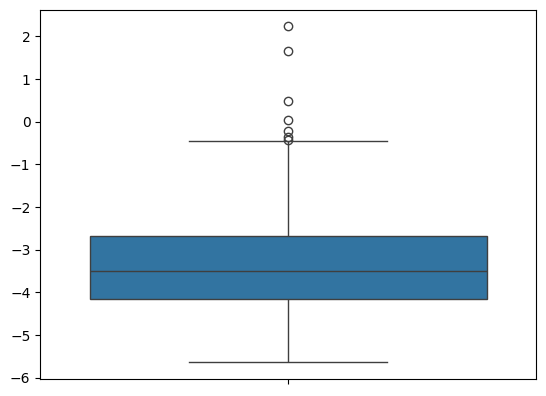

In [21]:
import seaborn as sns

sns.boxplot(predictions)

In [22]:
print(f'LightGBM MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')

LightGBM MSE: 0.8447, MAE: 0.6773, RMSE: 0.9191


In [23]:
import pickle

# save
with open('lgbm.pkl','wb') as f:
    pickle.dump(lgbm,f)
    
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)


In [24]:

with open('cols_from_descriptor.txt', 'w') as f:
    for line in good_cols:
        f.write(f"{line}\n")